In [1]:
import numpy as np
import matplotlib
#%matplotlib inline
## workaround for OS X
from sys import platform as sys_pf
if sys_pf == 'darwin':
    matplotlib.use("TkAgg")
import GP_progression_model
from GP_progression_model import DataGenerator
import torch
import pandas as pd

# Synthetic data generation

In [2]:
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.fastest = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Parameters for progression curves and data generation
# Max value
L = 1
# time interval
interval = [-15,15]

# Number of biomarkers
Nbiom = 6
# Number of individuals
Nsubs = 50
# Gaussian observational noise
noise = 0.1

# Creating random parameter sets for each biomarker's progression
flag = 0
while (flag!=1):
    CurveParam = []
    for i in range(Nbiom):
        CurveParam.append([L,0.8*np.random.rand(),noise])
        if CurveParam[i][1] > 0.0:
            flag = 1

In [3]:
# Calling the data generator
dg = DataGenerator.DataGenerator(Nbiom, interval, CurveParam, Nsubs)

### The object dg has 3 parameters defining the data
# dg.XData is a list with Nbiomarkers elements:
# for each element (biomarker) we have Nsubjects arrays with a random number of associated time points.
# This is the ground truth time along the disease progression associated to each subject.
####
# dg.YData is a list with Nbiomarkers elements:
# for each element (biomarker) we have Nsubjects arrays with measurements associated to the time points of dg.XData
####
# dg.ZeroXData is a list with Nbiomarkers elements:
# for each element (biomarker) we have Nsubjects arrays with the associated time points of dg.XData zero-centered. 
# This is the reparameterized time-axis corresponding to the observations. 

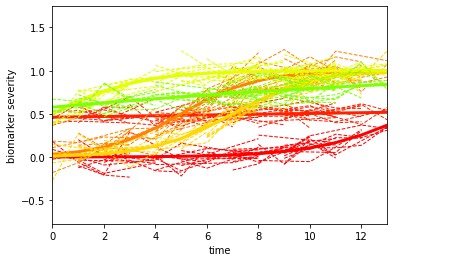

In [4]:
## Plotting ground truth progressions
%matplotlib inline
dg.plot(mode = 1)

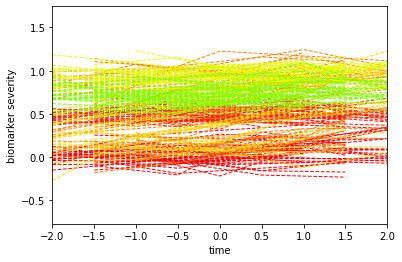

In [5]:
## Plotting reparemeterized progression (observed data)
%matplotlib inline
dg.plot(mode = 0)

In [6]:
# Creating empty data frame for output .csv
df = pd.DataFrame({'RID': [], 'time': []})    
col_biom = {}
for i in range(Nbiom): 
    col_biom['biom_' + str(i)] = [] 
    
df  = df.join(pd.DataFrame(col_biom)) 

In [7]:
# Assigning RID and generated time 
for i in range(len(dg.ZeroXData[0])): 
    for t in range(len(dg.ZeroXData[0][i])): 
        df = df.append({'RID':int(i),'time':dg.ZeroXData[0][i][t]}, ignore_index=True) 

In [8]:
# Assigning biomarkers values and zero-centered individual time points
for b in range(Nbiom): 
    for i in range(len(dg.ZeroXData[b])): 
        for t_i, t in enumerate(dg.ZeroXData[b][i]):
            df.loc[(df['RID'] == int(i)) & (df['time'] == t),'biom_'+str(b)] = dg.YData[b][i][t_i]
    

In [9]:
# This .csv has to be used for running any GPM
df.to_csv('data.csv')

In [10]:
# Including the ground truth time

df_gt = df.append({'time_gt' : []}, ignore_index=True) 

for i in range(len(dg.XData[0])): 
    for t in range(len(dg.ZeroXData[0][i])): 
        df_gt = df_gt.append({'RID':int(i),'time_gt':dg.XData[0][i][t]}, ignore_index=True) 


df_gt
df.to_csv('gt_data.csv')

In [11]:
disease_stage = pd.DataFrame({'RID' : np.arange(Nsubs), 'disease_stage' : dg.OutputTimeShift()})
disease_stage.to_csv('disease_stage.csv')

# Using GP Progression Model

/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Optimization step: 1 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 15.80 - Cost (fit): 205.13 - Cost (constr): 516.52|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 50 of 200 || Cost (DKL): 15.26 - Cost (fit): 150.06 - Cost (constr): 138.98|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 16.35 - Cost (fit): 174.24 - Cost (constr): 123.81|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 150 of 200 || Cost (DKL): 16.05 - Cost (fit): 150.73 - Cost (constr): 38.35|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 200 of 200 || Cost (DKL): 14.54 - Cost (fit): 127.89 - Cost (constr): 59.05|| Batch (each iter) of size 10 || Time (each iter): 0.05s


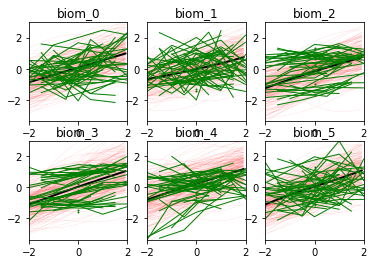

 -- Time reparameterization --
Iteration 1 of 200 || Cost (DKL): 14.54 - Cost (fit): 131.42 - Cost (constr): 30.13|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 14.54 - Cost (fit): 128.52 - Cost (constr): 27.83|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 14.54 - Cost (fit): 120.84 - Cost (constr): 39.84|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 150 of 200 || Cost (DKL): 14.54 - Cost (fit): 141.33 - Cost (constr): 76.46|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 200 of 200 || Cost (DKL): 14.54 - Cost (fit): 115.52 - Cost (constr): 52.48|| Batch (each iter) of size 10 || Time (each iter): 0.05s


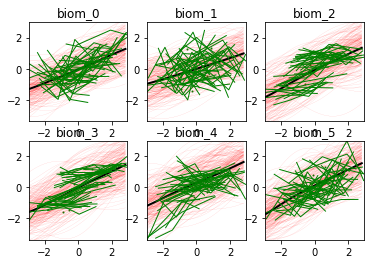

Optimization step: 2 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 14.49 - Cost (fit): 133.52 - Cost (constr): 28.76|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 12.95 - Cost (fit): 141.77 - Cost (constr): 27.74|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 11.59 - Cost (fit): 121.42 - Cost (constr): 38.54|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 150 of 200 || Cost (DKL): 10.60 - Cost (fit): 115.53 - Cost (constr): 31.40|| Batch (each iter) of size 10 || Time (each iter): 0.08s
Iteration 200 of 200 || Cost (DKL): 9.71 - Cost (fit): 82.12 - Cost (constr): 30.34|| Batch (each iter) of size 10 || Time (each iter): 0.06s


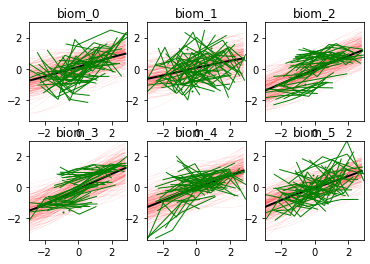

 -- Time reparameterization --
Iteration 1 of 200 || Cost (DKL): 9.71 - Cost (fit): 104.79 - Cost (constr): 27.69|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 9.71 - Cost (fit): 101.33 - Cost (constr): 27.74|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 9.71 - Cost (fit): 88.64 - Cost (constr): 27.69|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 150 of 200 || Cost (DKL): 9.71 - Cost (fit): 71.50 - Cost (constr): 31.32|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 200 of 200 || Cost (DKL): 9.71 - Cost (fit): 96.50 - Cost (constr): 27.69|| Batch (each iter) of size 10 || Time (each iter): 0.06s


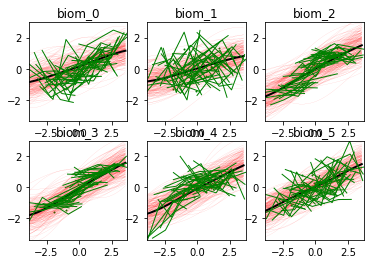

Optimization step: 3 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 9.69 - Cost (fit): 96.41 - Cost (constr): 30.51|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 8.88 - Cost (fit): 66.73 - Cost (constr): 41.77|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 8.63 - Cost (fit): 45.56 - Cost (constr): 31.88|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 150 of 200 || Cost (DKL): 7.99 - Cost (fit): 51.05 - Cost (constr): 30.67|| Batch (each iter) of size 10 || Time (each iter): 0.07s
Iteration 200 of 200 || Cost (DKL): 7.12 - Cost (fit): 41.57 - Cost (constr): 32.37|| Batch (each iter) of size 10 || Time (each iter): 0.06s


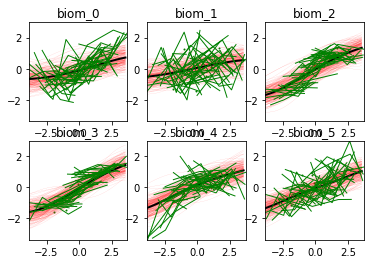

 -- Time reparameterization --
Iteration 1 of 200 || Cost (DKL): 7.12 - Cost (fit): 76.50 - Cost (constr): 35.97|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 7.12 - Cost (fit): 32.11 - Cost (constr): 27.84|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 100 of 200 || Cost (DKL): 7.12 - Cost (fit): 39.71 - Cost (constr): 27.69|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 150 of 200 || Cost (DKL): 7.12 - Cost (fit): 19.76 - Cost (constr): 32.08|| Batch (each iter) of size 10 || Time (each iter): 0.05s
Iteration 200 of 200 || Cost (DKL): 7.12 - Cost (fit): 57.12 - Cost (constr): 30.67|| Batch (each iter) of size 10 || Time (each iter): 0.06s


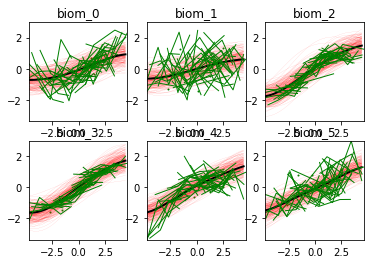

Optimization step: 4 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 7.11 - Cost (fit): 63.87 - Cost (constr): 27.73|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 6.53 - Cost (fit): 55.31 - Cost (constr): 27.73|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 6.09 - Cost (fit): 66.51 - Cost (constr): 27.79|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 150 of 200 || Cost (DKL): 5.83 - Cost (fit): 43.79 - Cost (constr): 27.70|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 200 of 200 || Cost (DKL): 5.40 - Cost (fit): 35.24 - Cost (constr): 33.96|| Batch (each iter) of size 10 || Time (each iter): 0.06s


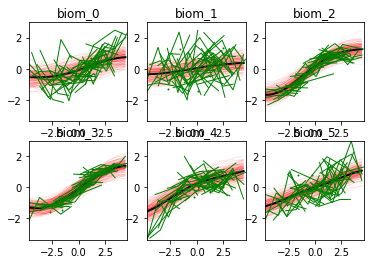

 -- Time reparameterization --
Iteration 1 of 200 || Cost (DKL): 5.40 - Cost (fit): 44.96 - Cost (constr): 28.35|| Batch (each iter) of size 10 || Time (each iter): 0.06s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 5.40 - Cost (fit): 44.61 - Cost (constr): 28.94|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 100 of 200 || Cost (DKL): 5.40 - Cost (fit): 26.43 - Cost (constr): 27.69|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 150 of 200 || Cost (DKL): 5.40 - Cost (fit): 44.44 - Cost (constr): 35.14|| Batch (each iter) of size 10 || Time (each iter): 0.06s
Iteration 200 of 200 || Cost (DKL): 5.40 - Cost (fit): 53.20 - Cost (constr): 27.71|| Batch (each iter) of size 10 || Time (each iter): 0.06s


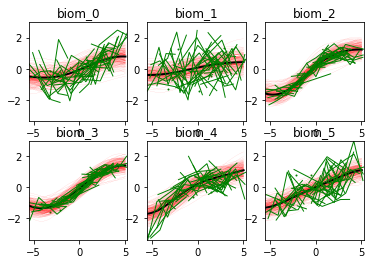

Optimization step: 5 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 5.41 - Cost (fit): 115.72 - Cost (constr): 27.69|| Batch (each iter) of size 50 || Time (each iter): 0.55s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 7.40 - Cost (fit): 67.40 - Cost (constr): 36.57|| Batch (each iter) of size 50 || Time (each iter): 1.27s
Iteration 100 of 200 || Cost (DKL): 9.17 - Cost (fit): 34.06 - Cost (constr): 37.42|| Batch (each iter) of size 50 || Time (each iter): 1.13s
Iteration 150 of 200 || Cost (DKL): 10.05 - Cost (fit): 3.48 - Cost (constr): 38.15|| Batch (each iter) of size 50 || Time (each iter): 1.29s
Iteration 200 of 200 || Cost (DKL): 10.55 - Cost (fit): 7.53 - Cost (constr): 43.03|| Batch (each iter) of size 50 || Time (each iter): 1.31s


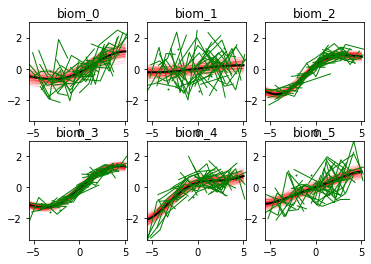

 -- Time reparameterization --
Iteration 1 of 200 || Cost (DKL): 10.55 - Cost (fit): 37.23 - Cost (constr): 28.43|| Batch (each iter) of size 50 || Time (each iter): 0.55s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 10.55 - Cost (fit): -20.18 - Cost (constr): 29.03|| Batch (each iter) of size 50 || Time (each iter): 1.28s
Iteration 100 of 200 || Cost (DKL): 10.55 - Cost (fit): 3.29 - Cost (constr): 34.11|| Batch (each iter) of size 50 || Time (each iter): 1.29s
Iteration 150 of 200 || Cost (DKL): 10.55 - Cost (fit): -13.16 - Cost (constr): 28.26|| Batch (each iter) of size 50 || Time (each iter): 1.34s
Iteration 200 of 200 || Cost (DKL): 10.55 - Cost (fit): -1.03 - Cost (constr): 32.04|| Batch (each iter) of size 50 || Time (each iter): 1.12s


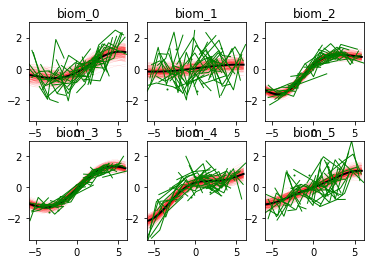

Optimization step: 6 out of 6
 -- Regression --
Iteration 1 of 200 || Cost (DKL): 10.57 - Cost (fit): 23.45 - Cost (constr): 30.63|| Batch (each iter) of size 50 || Time (each iter): 0.54s


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Iteration 50 of 200 || Cost (DKL): 10.79 - Cost (fit): -10.46 - Cost (constr): 29.06|| Batch (each iter) of size 50 || Time (each iter): 1.26s
Iteration 100 of 200 || Cost (DKL): 10.50 - Cost (fit): -14.08 - Cost (constr): 30.05|| Batch (each iter) of size 50 || Time (each iter): 1.18s
Iteration 150 of 200 || Cost (DKL): 11.46 - Cost (fit): -29.78 - Cost (constr): 29.72|| Batch (each iter) of size 50 || Time (each iter): 1.18s
Iteration 200 of 200 || Cost (DKL): 11.45 - Cost (fit): -37.34 - Cost (constr): 28.80|| Batch (each iter) of size 50 || Time (each iter): 1.20s


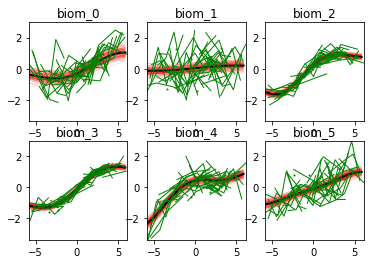

In [12]:
%matplotlib inline

monotonicity = np.repeat(1,Nbiom)

model = GP_progression_model.GP_Progression_Model(dg.ZeroXData,dg.YData, monotonicity = monotonicity, trade_off = 50,
                                                  names_biomarkers=['biom_' + str(i) for i in range(Nbiom)] )
model.Optimize(plot = True, verbose = True, benchmark=True, n_minibatch=5)

## Plotting results

/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


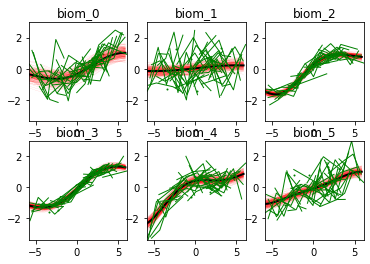

In [13]:
%matplotlib inline
model.Plot()


/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


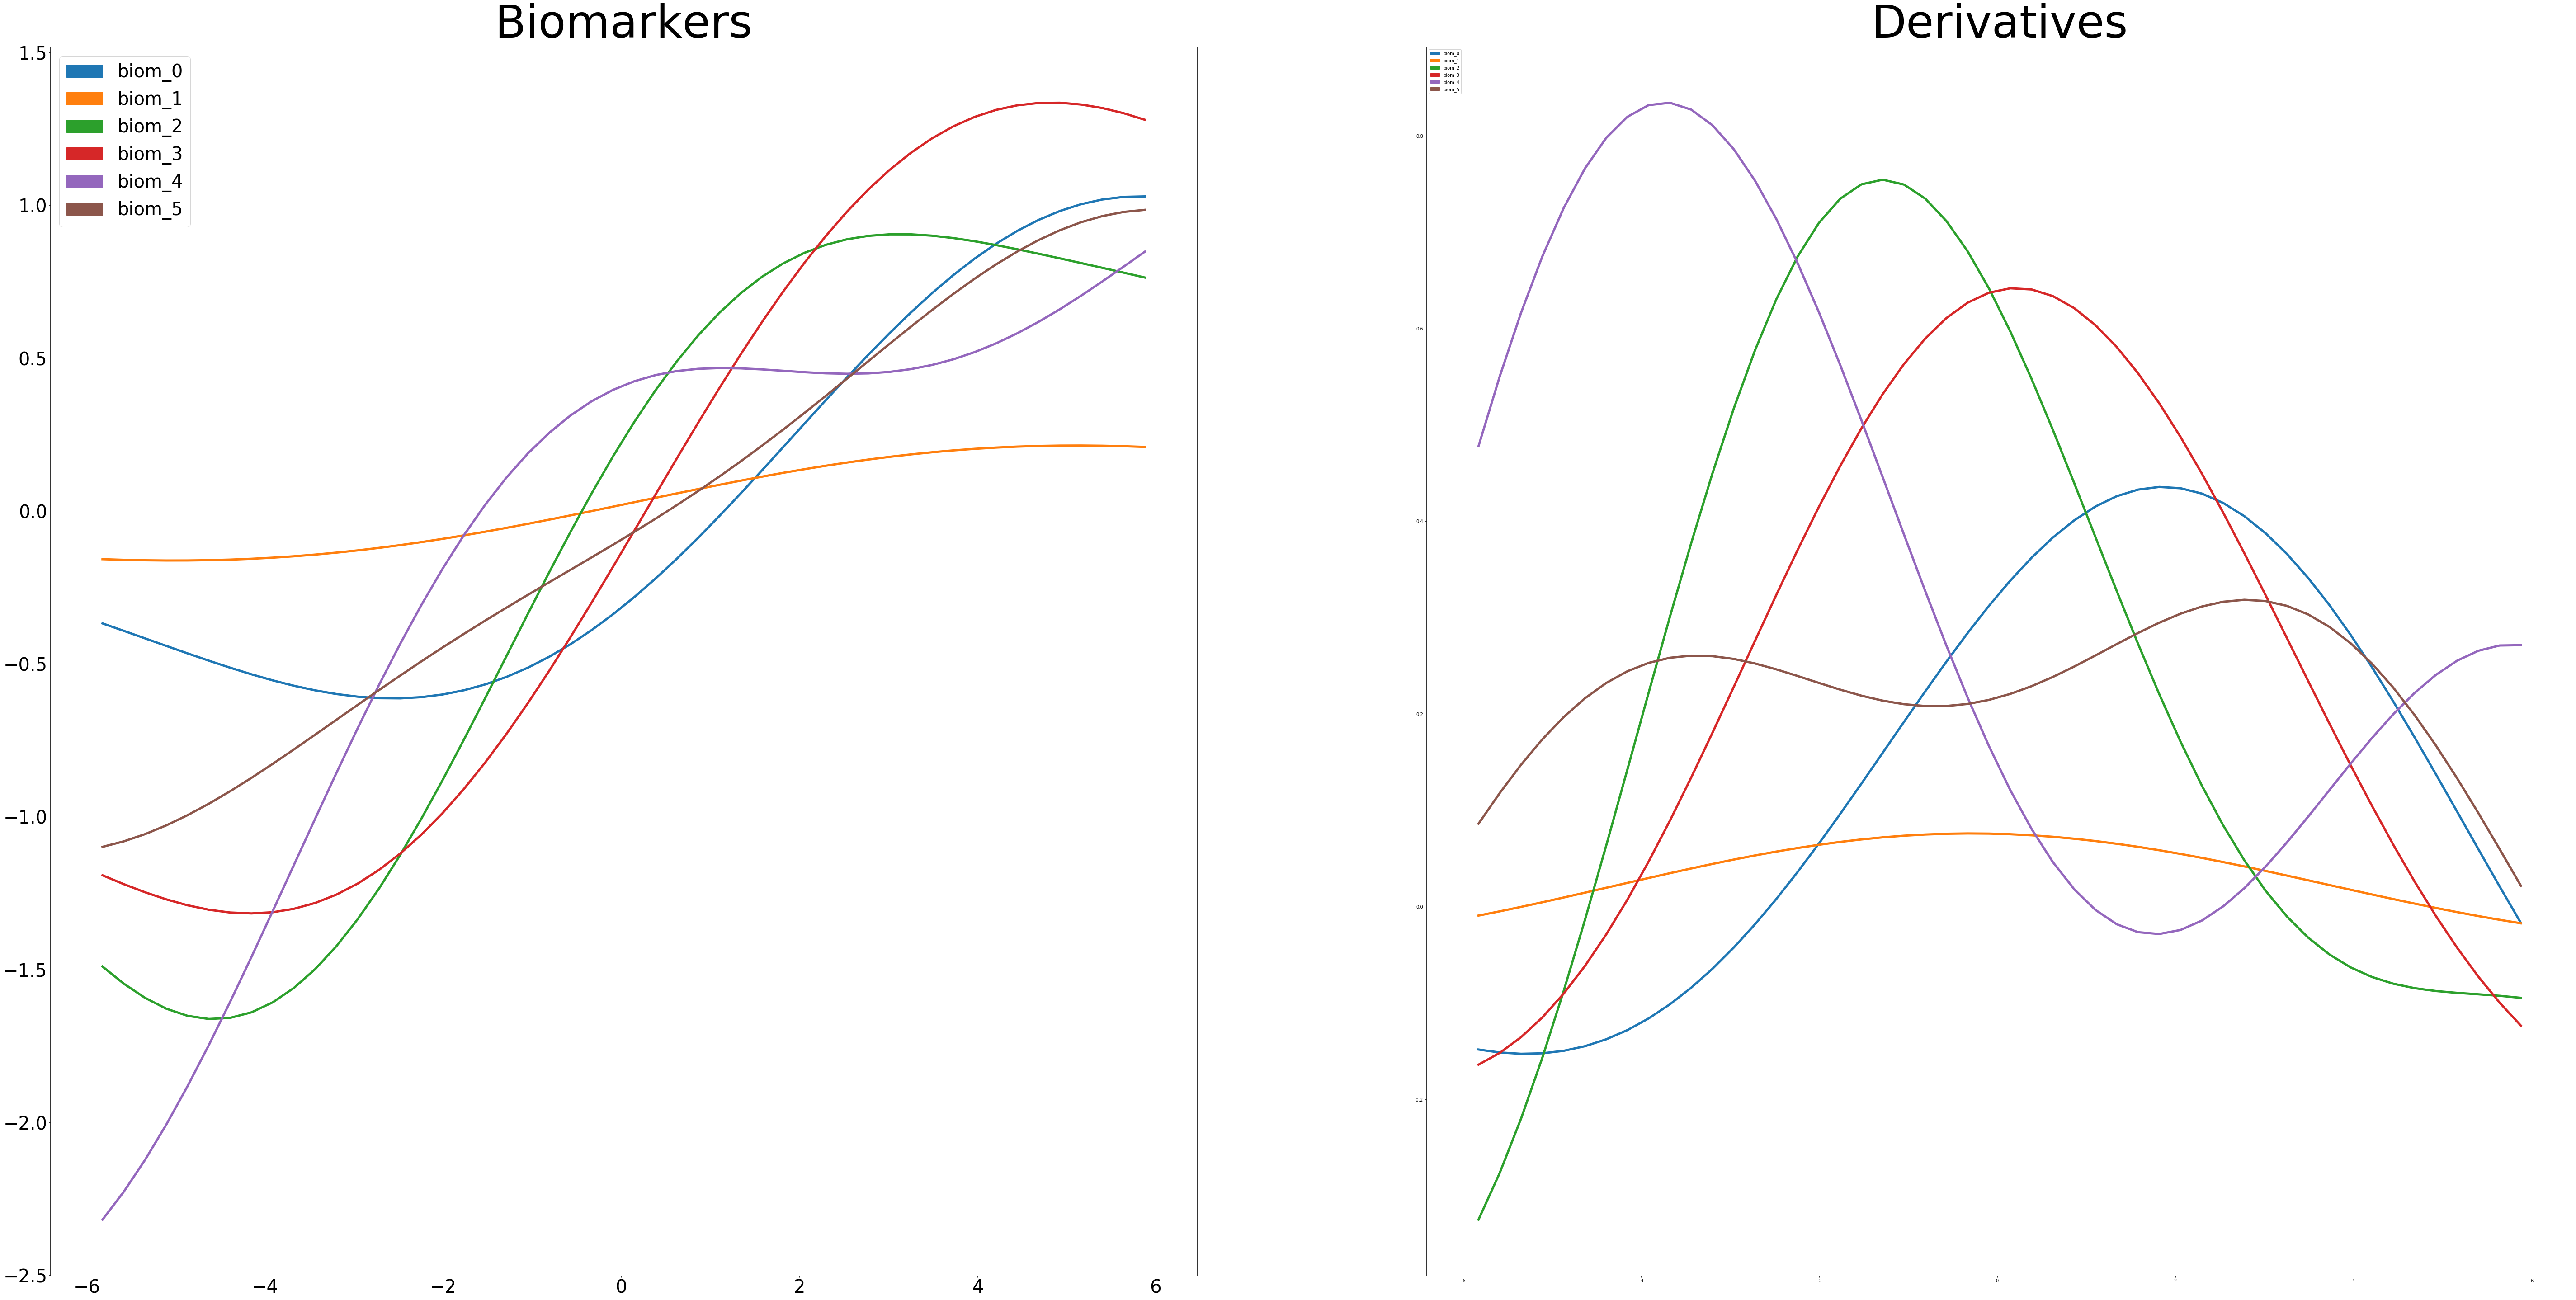

In [14]:
%matplotlib inline
model.Plot(joint = True)

In [15]:
x_test = []
y_test = []
for biom in range(model.N_biomarkers):
    x_test.append([])
    y_test.append([])
    for i in range(model.N_subs):
        x_test[biom].append(dg.ZeroXData[biom][i])
        y_test[biom].append(dg.YData[biom][i])

predictions = model.Predict(x_test, y_test)
optim_time = model.Diagnostic_predictions(predictions)

/Users/mlorenzi/miniconda3/envs/gppm/lib/python3.7/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Prediction for subject: 0
Prediction for subject: 1
Prediction for subject: 2
Prediction for subject: 3
Prediction for subject: 4
Prediction for subject: 5
Prediction for subject: 6
Prediction for subject: 7
Prediction for subject: 8
Prediction for subject: 9
Prediction for subject: 10
Prediction for subject: 11
Prediction for subject: 12
Prediction for subject: 13
Prediction for subject: 14
Prediction for subject: 15
Prediction for subject: 16
Prediction for subject: 17
Prediction for subject: 18
Prediction for subject: 19
Prediction for subject: 20
Prediction for subject: 21
Prediction for subject: 22
Prediction for subject: 23
Prediction for subject: 24
Prediction for subject: 25
Prediction for subject: 26
Prediction for subject: 27
Prediction for subject: 28
Prediction for subject: 29
Prediction for subject: 30
Prediction for subject: 31
Prediction for subject: 32
Prediction for subject: 33
Prediction for subject: 34
Prediction for subject: 35
Prediction for subject: 36
Prediction 

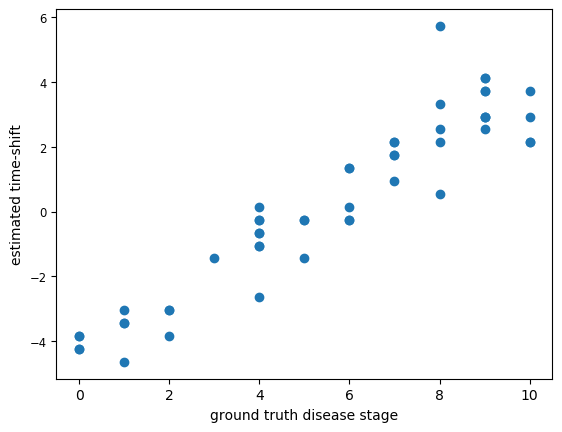

In [16]:
import matplotlib.pyplot as plt
plt.scatter(dg.OutputTimeShift(),optim_time)
plt.xlabel('ground truth disease stage')
plt.ylabel('estimated time-shift')
plt.show()